#### Discussion Related with Outliers and impact on Machine learning

#### Which machine learning models are sensitive to outliers?
- 1. Naive Bayes classifier  ----> not senstive to outlier
- 2. SVM-------------------------> not sensitive to outliers
- 3. Linear Regression-----------> sensitive to outliers
- 4. Logistic Regression---------> senssitive to outliers
- 5. Decision Tree Regression or Classifier ---> not sensitive to outliers
- 6. Ensemble( RF , XGboost, GB)---> not senstive to outliers (as they use decision tree internally)
- 7. KNN---------------------------> not sensitive to outliers (it selects only near distance)
- 8. Kmeans------------------------> sensitive to outliers( whole data is taken for clustering,cluster is based on euclidean distance)
- 9. Hierarichal-------------------> sensitive to outliers
- 10. PCA--------------------------->very sensitive to outliers (outliers doesnot allows to capture the whole variance)
- 11. Neural Network---------------->sensitive to outliers

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('titanic.csv')

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df['Age'].isnull().sum()

177

C:\Users\acer\AppData\Local\Temp\ipykernel_2352\615646242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna())


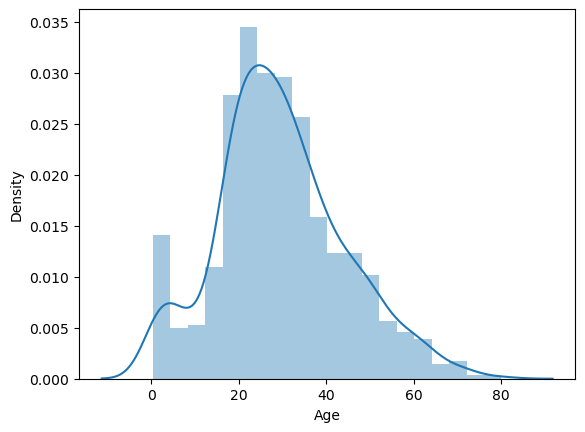

In [28]:
sns.distplot(df['Age'].dropna())
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_2352\3690677887.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(100)) # creating outlires by filling na value with 100


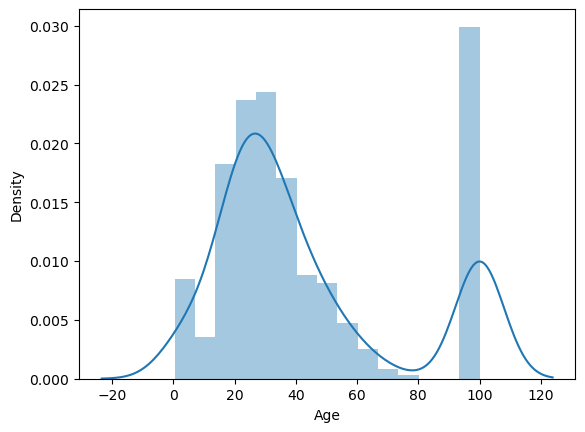

In [29]:
sns.distplot(df['Age'].fillna(100)) # creating outlires by filling na value with 100
plt.show()

### 1. Removing outliers for a normally distributed data

Text(0, 0.5, 'No of passenger')

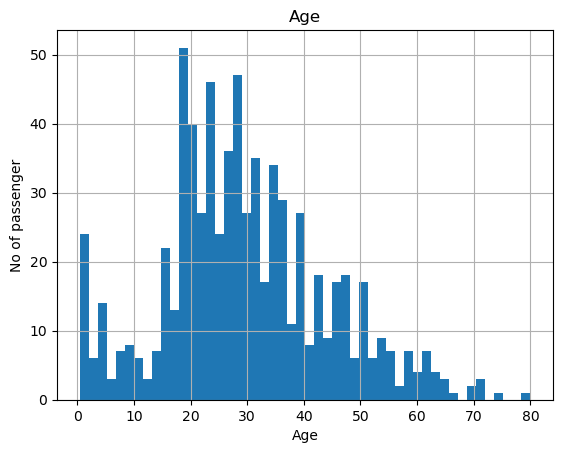

In [30]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')


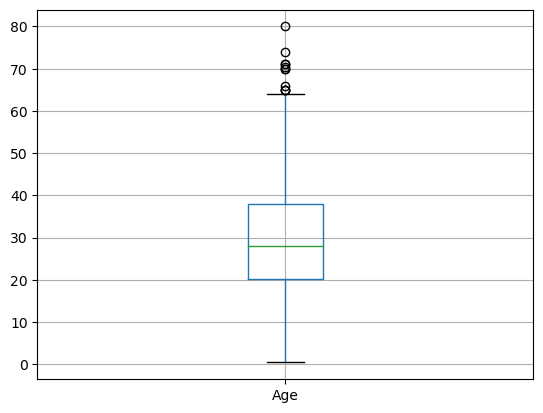

In [31]:
figure =df.boxplot(column ='Age')

In [32]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

- Assuming Age follows a guassian(normal) distribution we will calculate the boundaries which differentiates the outliers.
- We are taking 3 standard deviation from mean to both left and right.

In [33]:
upper_boundary = df['Age'].mean() + 3* df['Age'].std()
lower_boundary = df['Age'].mean() - 3* df['Age'].std()

In [36]:
print(upper_boundary)
print(lower_boundary)

73.27860964406095
-13.88037434994331


In [38]:
### comoputing InterQuantile range to calculate the boundaries
IQR = df.Age.quantile(0.75)-df.Age.quantile(0.25)

In [39]:
IQR

17.875

In [44]:
lower_bridge = df['Age'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Age'].quantile(0.75) + (IQR*1.5)
print(lower_bridge),print(upper_bridge)

-6.6875
64.8125


(None, None)

#### For Extreme Outlieres multiply by three

In [45]:
## For Extreme Outlieres multiply by three
lower_bridge = df['Age'].quantile(0.25) - (IQR*3)
upper_bridge = df['Age'].quantile(0.75) + (IQR*3)
print(lower_bridge),print(upper_bridge)

-33.5
91.625


(None, None)

### 2. For Skewed Features

Text(0, 0.5, 'No of passenger')

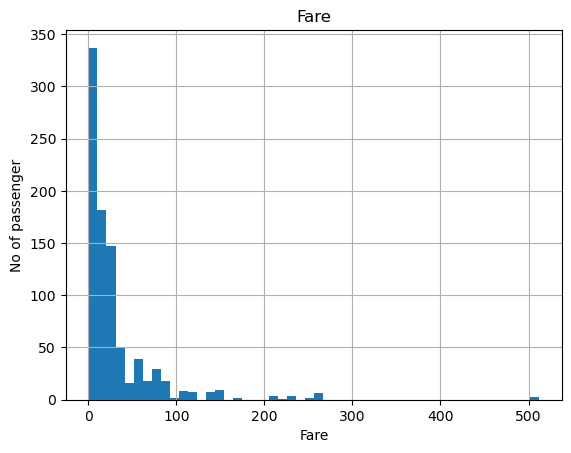

In [46]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

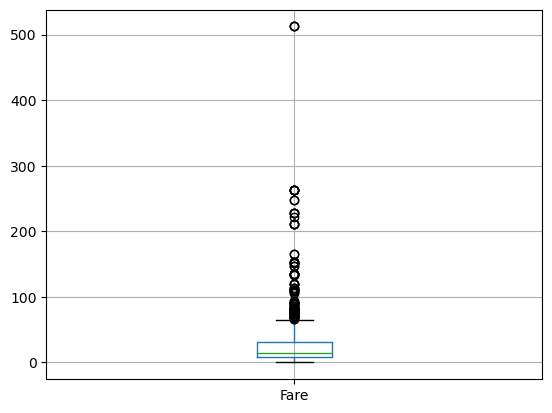

In [50]:
figure = df.boxplot(column= 'Fare')

In [51]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [52]:
IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [53]:
IQR

23.0896

In [55]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)
print(lower_bridge),print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [56]:
data =df.copy()

In [57]:
data.loc[data['Age']>73, 'Age']= 73

In [59]:
data.loc[data['Fare']>100, 'Fare'] =100

In [60]:
data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Text(0, 0.5, 'No of passenger')

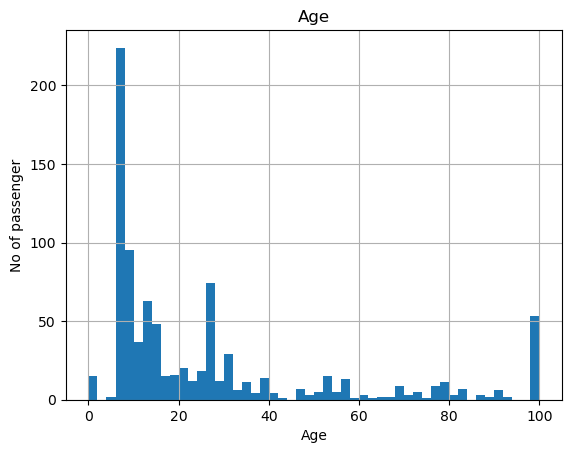

In [63]:
figure = data.Fare.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

- The outliers is 100 now not 512

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0), data['Survived'],test_size=0.3)

In [71]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score:{}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score:0.6492537313432836
roc_auc_score:0.6495684695051784


In [75]:
### RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score:{}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score:0.6305970149253731
roc_auc_score:0.6910241657077101
